In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')  # Correct variable name

# Step 2: Merge the customer and transaction data based on CustomerID
merged_df = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID')




Davies-Bouldin Index: 1.01570117020714


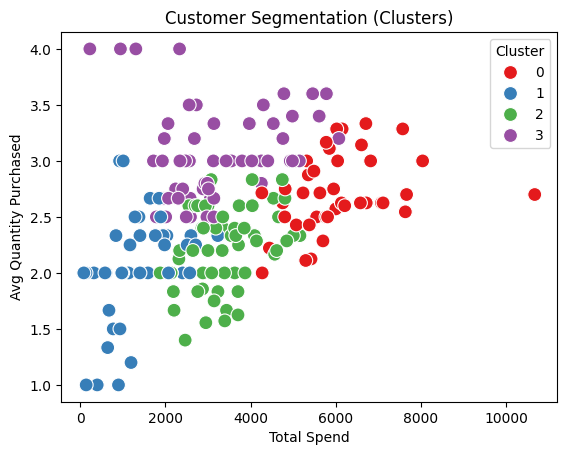

In [7]:
# Step 3: Feature Engineering (Aggregating data for each customer)
customer_features = merged_df.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AvgQuantityPurchased=('Quantity', 'mean'),
    ProductDiversity=('ProductID', 'nunique'),
    Frequency=('TransactionID', 'count')
).reset_index()

# Step 4: Select features for clustering
X = customer_features[['TotalSpend', 'AvgQuantityPurchased', 'ProductDiversity', 'Frequency']]

# Step 5: Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Calculate the Davies-Bouldin Index (for evaluating clustering quality)
db_index = davies_bouldin_score(X_scaled, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Step 8: Visualize the Clusters
sns.scatterplot(x=customer_features['TotalSpend'], y=customer_features['AvgQuantityPurchased'], 
                hue=customer_features['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation (Clusters)')
plt.xlabel('Total Spend')
plt.ylabel('Avg Quantity Purchased')
plt.show()

Davies-Bouldin Index: 1.0034325402540283
Silhouette Score: 0.28686088989187464


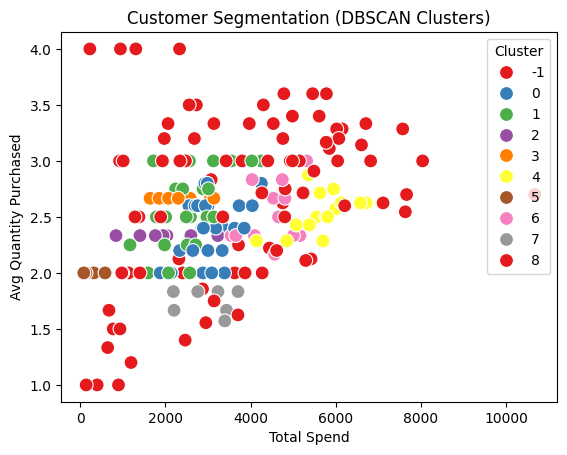

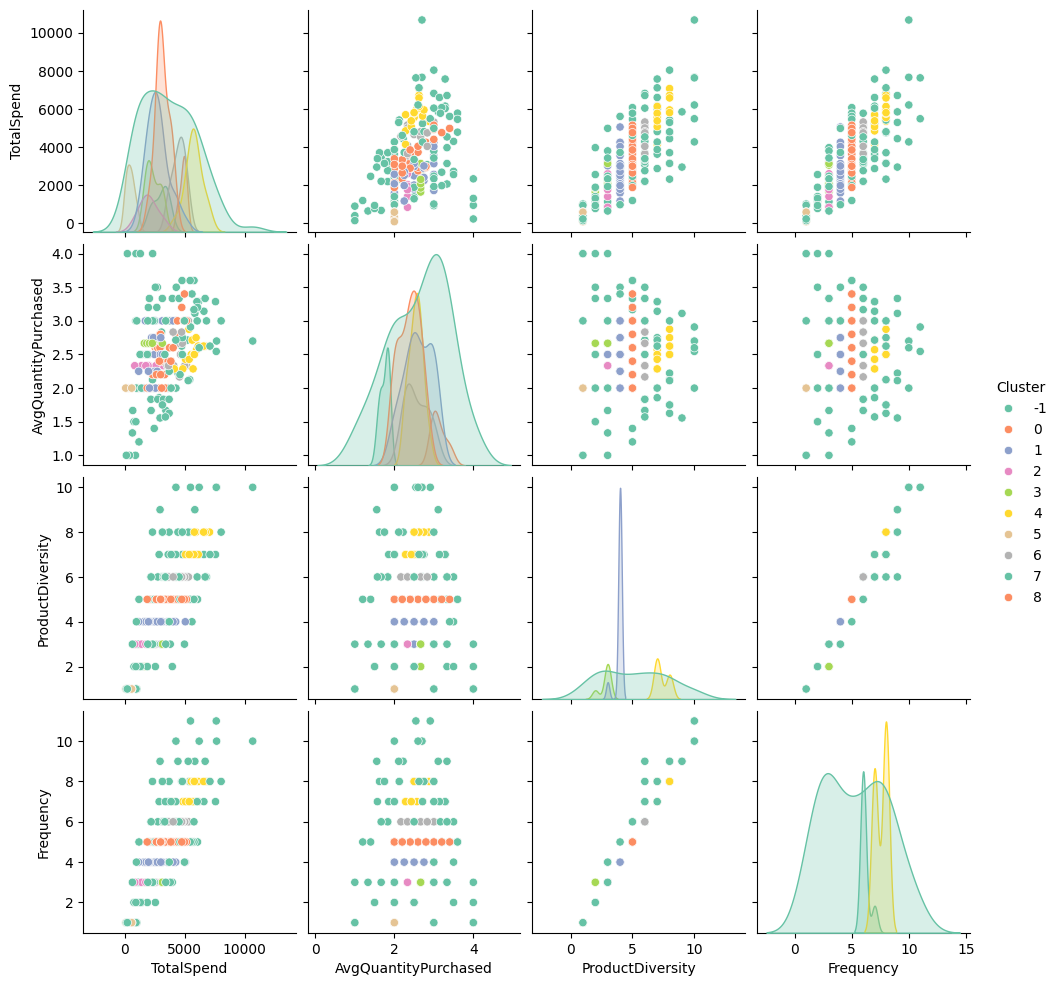

Customer Distribution by Cluster:
Cluster
-1    81
 0    27
 1    27
 4    16
 6    13
 3    10
 2     7
 7     7
 5     6
 8     5
Name: count, dtype: int64
Number of Noise Points: 81


In [12]:
#DBSCAN

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Step 2: Merge the customer and transaction data based on CustomerID
merged_df = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID')

# Step 3: Feature Engineering (Aggregating data for each customer)
customer_features = merged_df.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AvgQuantityPurchased=('Quantity', 'mean'),
    ProductDiversity=('ProductID', 'nunique'),
    Frequency=('TransactionID', 'count')
).reset_index()

# Step 4: Select features for clustering
X = customer_features[['TotalSpend', 'AvgQuantityPurchased', 'ProductDiversity', 'Frequency']]

# Step 5: Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply DBSCAN Clustering
# Set epsilon (neighborhood radius) and minimum samples per cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_features['Cluster'] = dbscan.fit_predict(X_scaled)

# Step 7: Calculate Metrics
# Filter out noise points (-1 cluster label)
valid_clusters = customer_features[customer_features['Cluster'] != -1]

if valid_clusters.empty:
    print("No valid clusters were formed. Adjust parameters (eps, min_samples) or preprocess data.")
else:
    db_index = davies_bouldin_score(X_scaled[valid_clusters.index], valid_clusters['Cluster'])
    sil_score = silhouette_score(X_scaled[valid_clusters.index], valid_clusters['Cluster'])
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Silhouette Score: {sil_score}")

# Step 8: Visualize the Clusters
# Scatter plot for Total Spend vs Avg Quantity Purchased
sns.scatterplot(
    x=customer_features['TotalSpend'],
    y=customer_features['AvgQuantityPurchased'],
    hue=customer_features['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segmentation (DBSCAN Clusters)')
plt.xlabel('Total Spend')
plt.ylabel('Avg Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

# Pair plot for deeper relationships within clusters
sns.pairplot(
    customer_features[['TotalSpend', 'AvgQuantityPurchased', 'ProductDiversity', 'Frequency', 'Cluster']],
    hue='Cluster',
    palette='Set2'
)
plt.show()

# Step 9: Interpret Results
# Count customers in each cluster
cluster_counts = customer_features['Cluster'].value_counts()
print("Customer Distribution by Cluster:")
print(cluster_counts)

# Output noise points
noise_points = customer_features[customer_features['Cluster'] == -1]
print(f"Number of Noise Points: {len(noise_points)}")
